In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import os
import glob
from PIL import Image


def load_images_from_folder(root_folder):
    # 获取所有支持的图片格式的文件
    img_formats = ["jpg", "jpeg", "png", "bmp"]
    files = []
    for img_format in img_formats:
        files.extend(glob.glob(root_folder + f"/**/*.{img_format}", recursive=True))

    # 加载图片
    images = [Image.open(file) for file in files]

    return images


root_folder = "./dataset/greyscales/dss"  # 替换为您的文件夹路径
images = load_images_from_folder(root_folder)
print(f"Loaded {len(images)} images.")

Loaded 3630 images.


In [5]:
import torch
from torchvision import transforms
import numpy as np

transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
    ]
)
images_resized = [transform(img) for img in images]
flatted_imgs = [np.array(img).flatten() for img in images_resized]

In [6]:
flatted_imgs[0][0]

0.13333334

In [64]:
num_classes = 5
kmodel = KMeans(n_clusters=num_classes)
kmodel.fit(flatted_imgs[1:1000])
kpredictions = kmodel.predict(flatted_imgs)
kpredictions

c:\Users\yitao\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yitao\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([4, 4, 4, ..., 0, 2, 1])

In [31]:
print(kpredictions)

[1 1 0 ... 1 2 0]


In [32]:
kpredictions[49]

0

In [8]:
from matplotlib import pyplot as plt

img_0 = flatted_imgs[1].reshape(128, 128)

In [65]:
special_cases_0 = np.where(kpredictions == 0)[0]
special_cases_1 = np.where(kpredictions == 1)[0]
special_cases_2 = np.where(kpredictions == 2)[0]

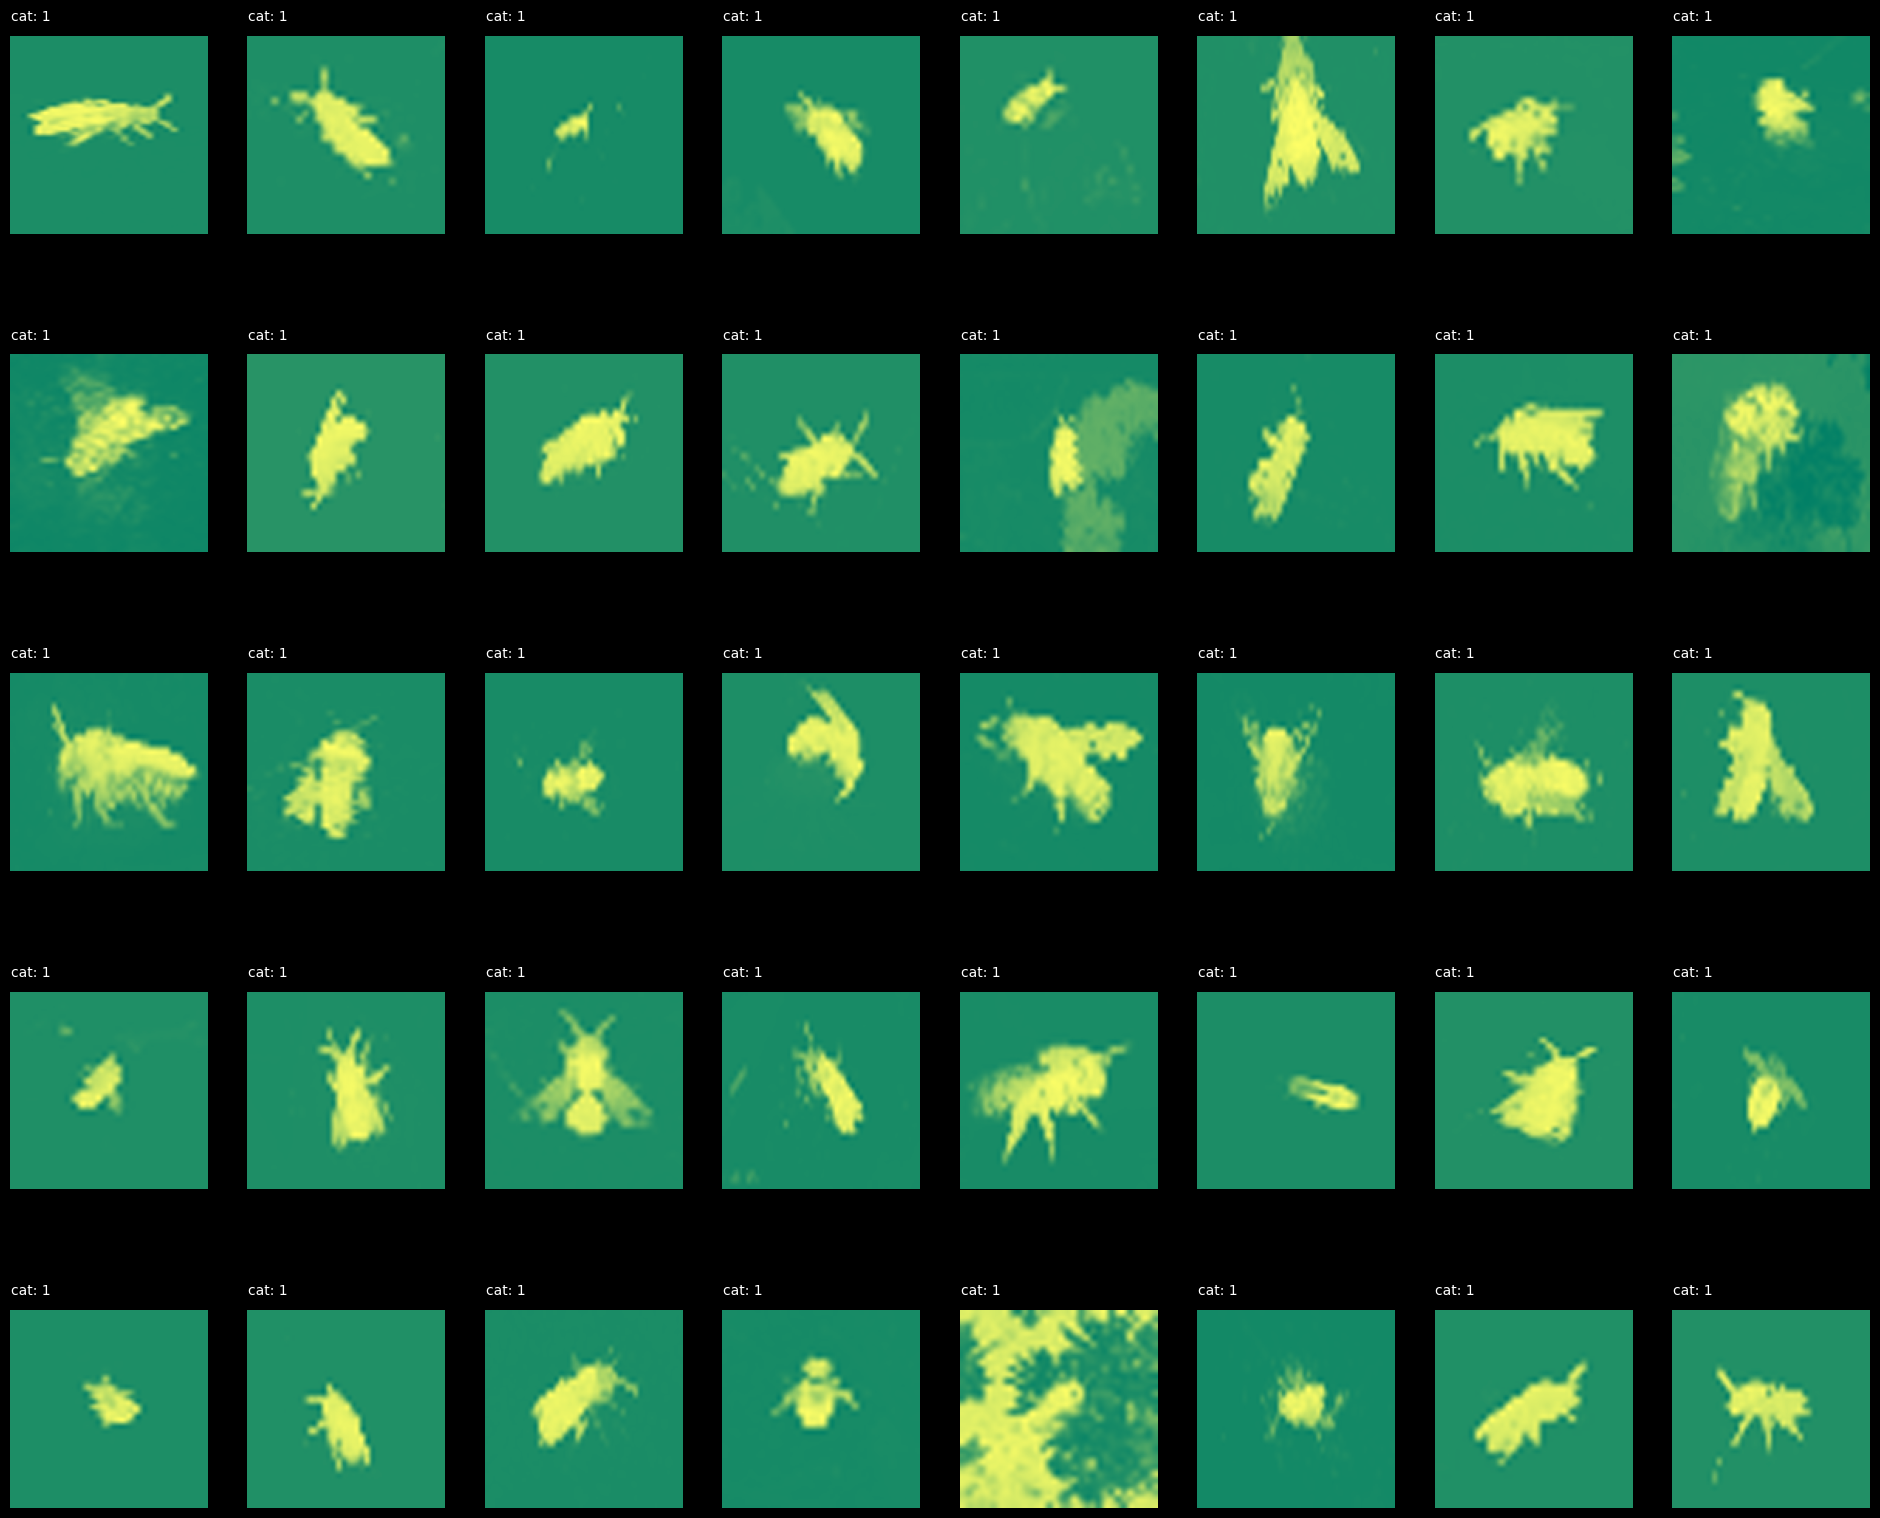

In [66]:
offset = 0
num_showcases = 40
images_per_row = 8

num_rows = num_showcases // images_per_row
if num_showcases % images_per_row:
    num_rows += 1

_, ax = plt.subplots(num_rows, images_per_row, figsize=(3 * images_per_row, 4 * num_rows))

if num_rows == 1:
    ax = ax.reshape(1, -1)

# 关闭所有子图的坐标轴
[a.axis("off") for a in ax.flatten()]

for i in range(num_showcases):
    row = i // images_per_row
    col = i % images_per_row
    ax[row, col].text(0, -10, "cat: " + str(kpredictions[offset + special_cases_1[i]]))
    ax[row, col].imshow(flatted_imgs[offset + special_cases_1[i] + 1].reshape(128, 128), cmap="summer")

plt.show()

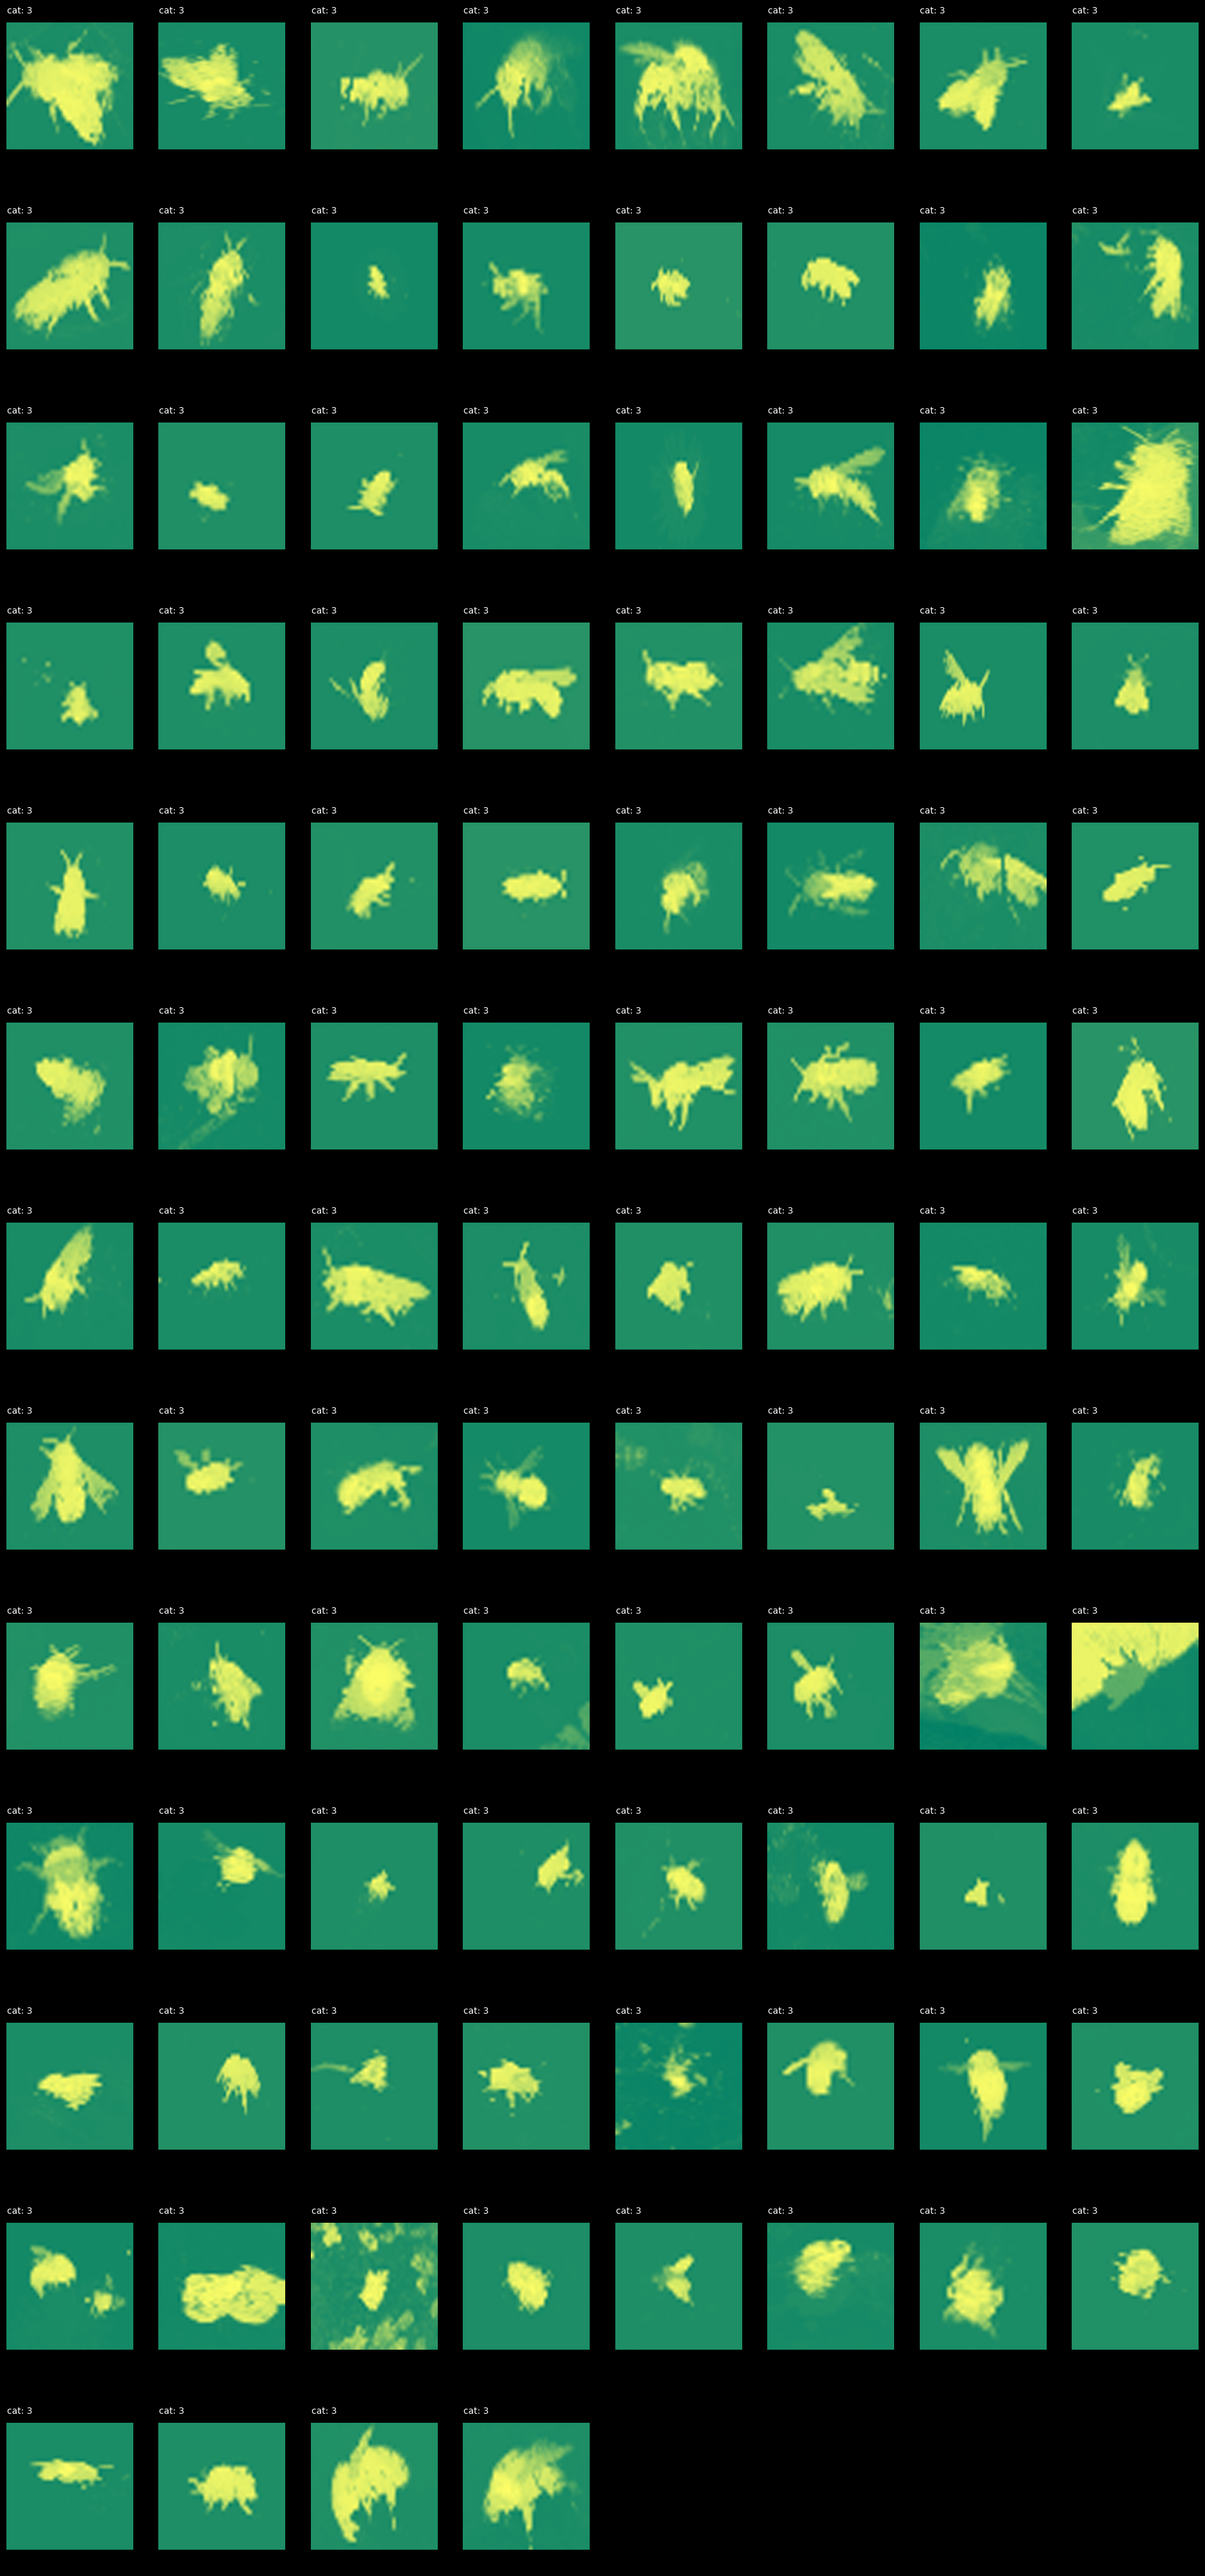

In [71]:
offset = 0
num_showcases = 100
images_per_row = 8

selected_class = 3

num_rows = num_showcases // images_per_row
if num_showcases % images_per_row:
    num_rows += 1

_, ax = plt.subplots(num_rows, images_per_row, figsize=(3 * images_per_row, 4 * num_rows))

if num_rows == 1:
    ax = ax.reshape(1, -1)

# 关闭所有子图的坐标轴
[a.axis("off") for a in ax.flatten()]

for i in range(num_showcases):
    row = i // images_per_row
    col = i % images_per_row
    ax[row, col].text(0, -10, "cat: " + str(kpredictions[offset + np.where(kpredictions == selected_class)[0][i]]))
    ax[row, col].imshow(flatted_imgs[offset + np.where(kpredictions == selected_class)[0][i] + 1].reshape(128, 128), cmap="summer")

plt.show()

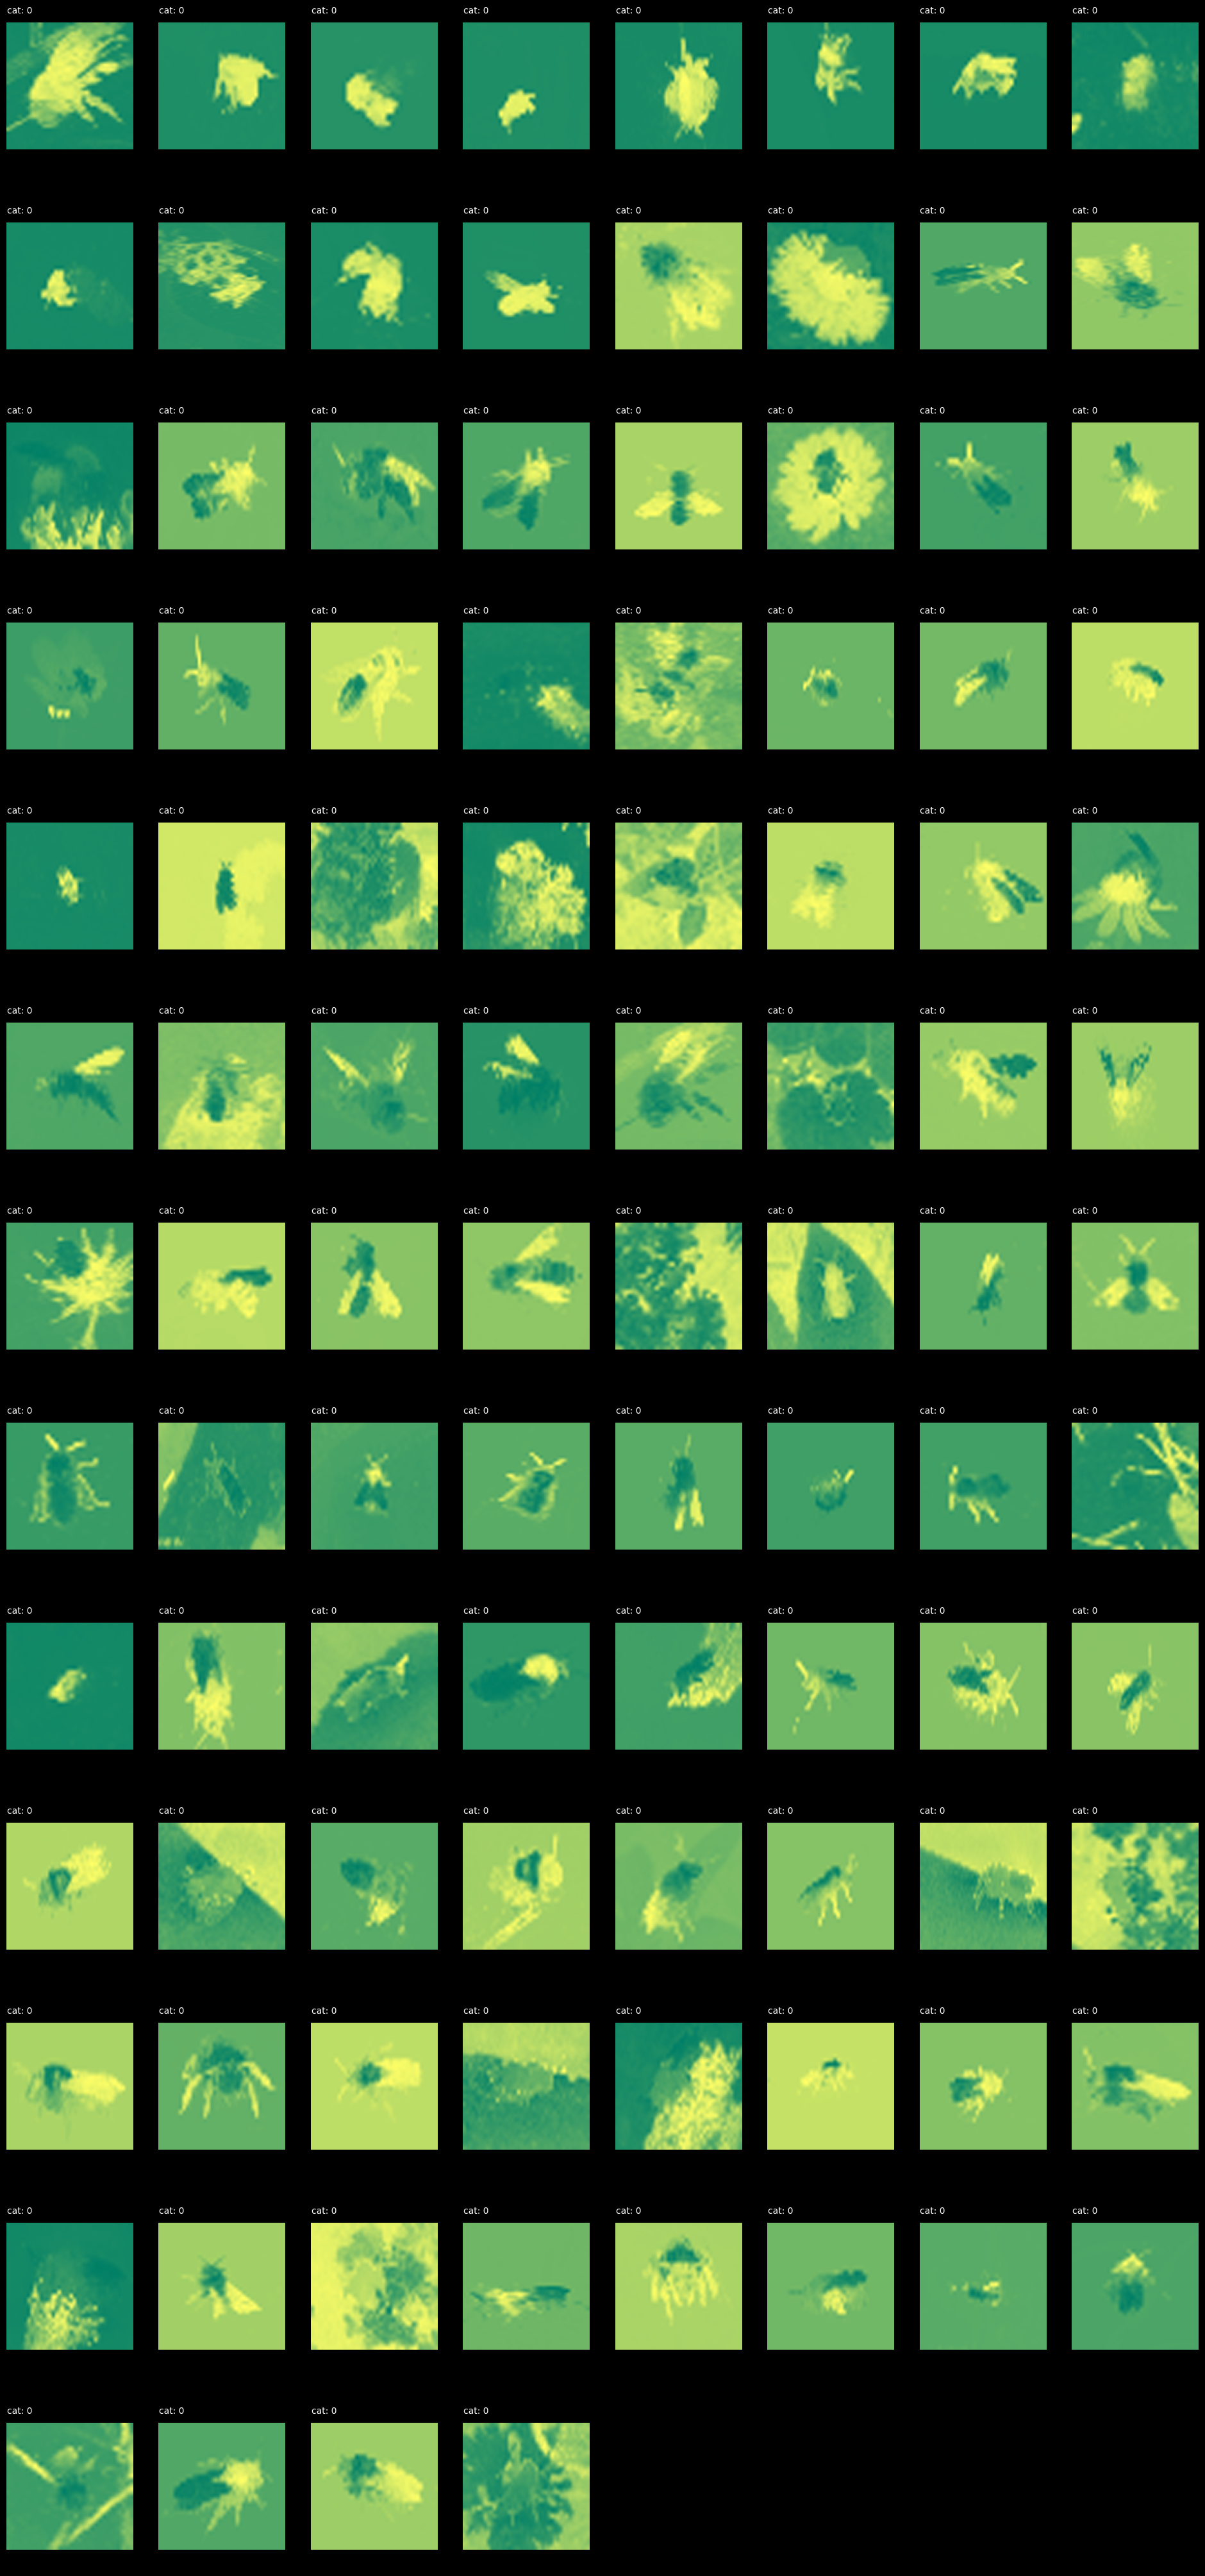

In [69]:
offset = 0
num_showcases = 100
images_per_row = 8

num_rows = num_showcases // images_per_row
if num_showcases % images_per_row:
    num_rows += 1

_, ax = plt.subplots(num_rows, images_per_row, figsize=(3 * images_per_row, 4 * num_rows))

if num_rows == 1:
    ax = ax.reshape(1, -1)

# 关闭所有子图的坐标轴
[a.axis("off") for a in ax.flatten()]

for i in range(num_showcases):
    row = i // images_per_row
    col = i % images_per_row
    ax[row, col].text(0, -10, "cat: " + str(kpredictions[offset + special_cases_0[i]]))
    ax[row, col].imshow(flatted_imgs[offset + special_cases_0[i] + 1].reshape(128, 128), cmap="summer")

plt.show()

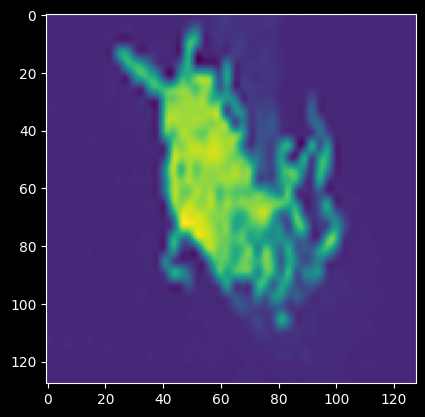

In [9]:
plt.imshow(img_0)